<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/Miscellaneous/lista2_FTs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

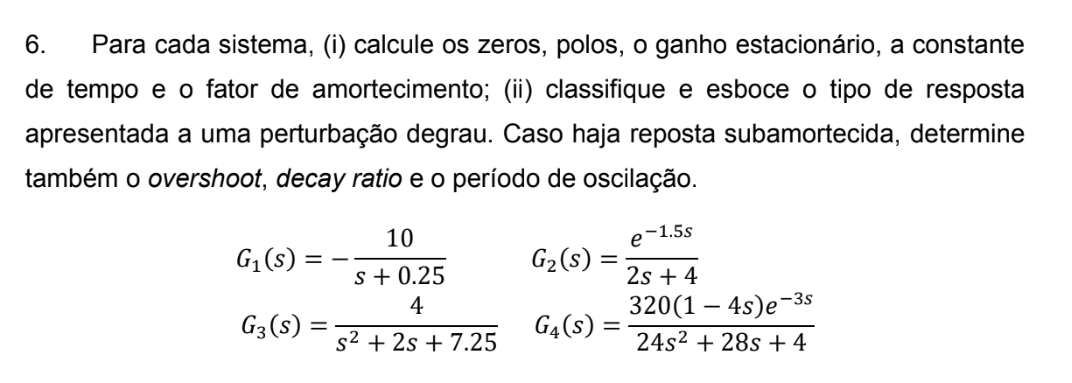

In [2]:
! pip install -qq control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 7.0 MB/s eta 0:00:00


In [48]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

In [64]:
def calcula_zpk(G):
  z = ct.zero(G)
  p = ct.pole(G)
  K = ct.dcgain(G)
  print('zero =', z)
  print('polo =', p)
  print('ganho =', K)
  if len(p)>1:
    # segunda ordem
    tau = 1/(p[0]*p[1])
    xi = (-(p[0]+p[1])/(p[0]*p[1]))/(2*tau)
    print('xi = ', xi)
    print('tau = ', 1/wn[0])


def resposta_degrau(G):
  t, y = ct.step_response(G)
  plt.plot(t,y)
  plt.xlabel('Tempo, t')
  plt.ylabel('Saída do sistema, y')
  plt.title('Resposta ao degrau unitário')
  plt.grid()


  -10
--------
s + 0.25

zero = []
polo = [-0.25+0.j]
ganho = -40.0


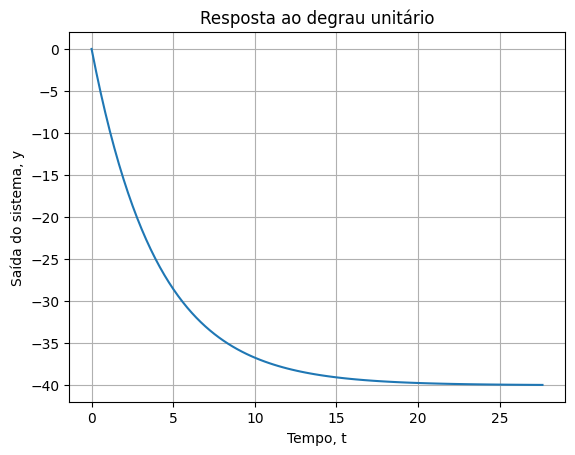

In [19]:
G1 = ct.tf(-10,[1,0.25])
print(G1)
calcula_zpk(G1)
resposta_degrau(G1)


   1
-------
2 s + 4

zero = []
polo = [-2.+0.j]
ganho = 0.25


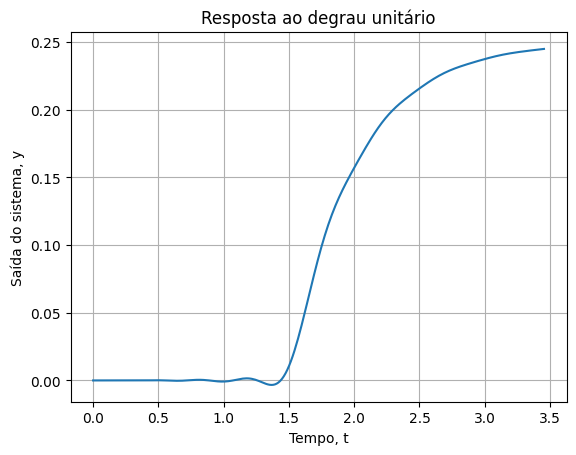

In [32]:
G2 = ct.tf(1,[2,4])
G_td = ct.tf(*ct.pade(1.5,14,10)) # deve-se ajusta a ordem da aproximação de Pade
print(G2)
calcula_zpk(G2)
resposta_degrau(G2*G_td) # incluindo o tempo-morto


       4
----------------
s^2 + 2 s + 7.25

zero = []
polo = [-1.+2.5j -1.-2.5j]
ganho = 0.5517241379310345
xi =  (0.9999999999999997-0j)
tau =  0.37139067635410383


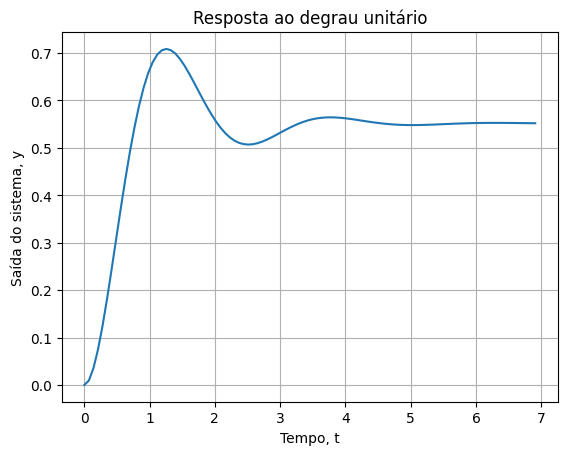

In [70]:
G3 = ct.tf(4,[1,2,7.25])
print(G3)
calcula_zpk(G3)
resposta_degrau(G3)


  -1280 s + 320
-----------------
24 s^2 + 28 s + 4

zero = [0.25+0.j]
polo = [-1.        +0.j -0.16666667+0.j]
ganho = 80.0
xi =  (0.5833333333333333+0j)
tau =  0.37139067635410383


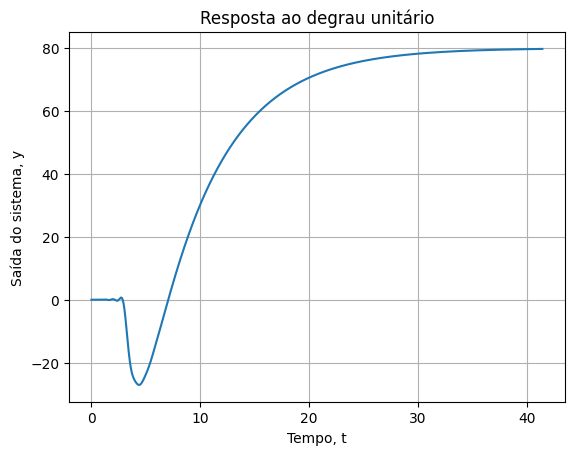

In [68]:
G4 = 320*ct.tf([-4, 1],[24,28,4])
G_td = ct.tf(*ct.pade(3,14,10)) # deve-se ajusta a ordem da aproximação de Pade
print(G4)
calcula_zpk(G4)
resposta_degrau(G4*G_td) # incluindo o tempo-morto

In [67]:
wn, zeta, poles = ct.damp(G3)

    Eigenvalue (pole)       Damping     Frequency
        -1      +2.5j        0.3714         2.693
        -1      -2.5j        0.3714         2.693
